## Violence Detection Training

### Using frame data from 20 sequential frames

by: Paolo Sandejas, Jomari Deligero
Computer Vision and Machine Learning Group - University of the Philippines Diliman


## Training the SVM model

In [1]:
import pandas as pd # used to load and manipulate the data
import matplotlib.pyplot as plt # used to draw graphs
from sklearn.model_selection import train_test_split # used to split the data into train and test sets
from sklearn.svm import SVC # used to make the SVM
from sklearn.model_selection import GridSearchCV # used for cross validation
from sklearn.metrics import classification_report # used to create a classification report
from sklearn.metrics import plot_confusion_matrix # used to plot the confusion matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve # used to evaluate models
from sklearn.model_selection import cross_val_score # used to cross validate
# import io # for google colab
# from google.colab import files # for google colab

## Storing multiple frames in a single row

By storing the data of multiple frames in a single row we'll be able to give our model a better understanding of the video's current state. To improve on past iterations we'll be storing data from 20 sequential frames in one row. 

In [2]:
import pandas as pd

frame_data = pd.read_csv("frame_data3.csv", header=0)

frame_data

,file_name,frame_number,person0_rs_angle,person0_re_angle,person0_rk_angle,person0_ls_angle,person0_le_angle,person0_lk_angle,person1_rs_angle,person1_re_angle,...,person1_rs_velocity,person1_re_velocity,person1_rw_velocity,person1_rh_velocity,person1_ls_velocity,person1_le_velocity,person1_lw_velocity,person1_lh_velocity,has_contact,label
0,0_act_01-2,0,-82.425422,48.278431,6.140629,-60.198906,49.307964,-6.190011,-53.504350,25.779757,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
1,0_act_01-2,1,-87.262089,59.083442,8.240153,-74.421739,85.375448,-4.822743,-43.844228,22.526442,...,5304.467671,4314.308288,3369.623264,669.216683,6352.883634,6392.814410,5365.534163,5329.763782,1,0
2,0_act_01-2,2,-83.624534,62.517635,11.711713,-79.555856,53.793476,-6.440169,-33.734549,20.725861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
3,0_act_01-2,3,-85.955723,75.289759,9.225560,-33.302852,45.327091,-3.103538,-29.957332,29.401669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0
4,0_act_01-2,4,0.259434,87.446213,11.036164,-74.628099,56.696494,-3.257665,-32.734462,42.639135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46679,1_act_06-8-flipped\1_act_06-8 (flipped),140,-72.351375,24.405304,2.303672,-46.514572,30.136085,-1.296410,-78.987420,9.485388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
46680,1_act_06-8-flipped\1_act_06-8 (flipped),141,-70.140908,14.091881,2.796829,-39.817875,35.013487,0.997423,-77.267646,7.788346,...,3643.719897,3566.895796,3645.450699,2820.610628,3757.642013,3158.272870,2523.598920,3172.581581,0,1
46681,1_act_06-8-flipped\1_act_06-8 (flipped),142,-70.591776,9.440542,4.695892,-50.379988,34.803673,3.487007,-76.759488,6.678286,...,3484.812397,3449.110257,3452.414838,2779.624918,3524.902614,3028.989785,2412.056618,3092.935578,0,1
46682,1_act_06-8-flipped\1_act_06-8 (flipped),143,-76.213975,4.133835,6.842143,-54.611256,40.564611,3.595064,-75.357639,9.977152,...,3404.955960,3366.739496,3368.819598,2662.077229,3408.363368,2832.995288,2246.187295,3055.777901,0,1


In [3]:
# create new pandas dataframe

# create base list
base_angle_features = [
    "person0_rs_angle", 
    "person0_re_angle", 
    "person0_rk_angle", 
    "person0_ls_angle", 
    "person0_le_angle", 
    "person0_lk_angle", 
    "person1_rs_angle",
    "person1_re_angle",
    "person1_rk_angle",
    "person1_ls_angle",
    "person1_le_angle",
    "person1_lk_angle"
]

base_velocity_features = [
    "person0_h_velocity",
    "person0_rs_velocity",
    "person0_re_velocity",
    "person0_rw_velocity",
    "person0_rh_velocity",
    "person0_ls_velocity",
    "person0_le_velocity",
    "person0_lw_velocity",
    "person0_lh_velocity",
    "person1_h_velocity",
    "person1_rs_velocity",
    "person1_re_velocity",
    "person1_rw_velocity",
    "person1_rh_velocity",
    "person1_ls_velocity",
    "person1_le_velocity",
    "person1_lw_velocity",
    "person1_lh_velocity"
]

base_contact_features = ["has_contact"]

all_base_feature_columns = base_angle_features + base_velocity_features + base_contact_features

# create features for 20 frames

new_seq_features = []
for i in range(20):
    for col_name in all_base_feature_columns:
        temp = str(i) + '-' + col_name
        new_seq_features.append(temp)


new_columns = ["file_name", "batch_number"] + new_seq_features + ["label"]

new_frame_data = pd.DataFrame(columns=new_columns)

new_frame_data

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,19-person1_rs_velocity,19-person1_re_velocity,19-person1_rw_velocity,19-person1_rh_velocity,19-person1_ls_velocity,19-person1_le_velocity,19-person1_lw_velocity,19-person1_lh_velocity,19-has_contact,label


In [4]:
curr_batch = []
curr_file = ""
batch_number = 0
counter = 0

for index, row in frame_data.iterrows():
    # for each row in our frame data
    if curr_file != row["file_name"]:
        # we're in a new file
        curr_file = row["file_name"]
        curr_label = row["label"]
        print("curr_file is -> {}".format(curr_file))
        
        # clear the curr batch since we're in a new file
        curr_batch.clear()

    # curr frame list will store the current frame's data
    curr_frame = []

    # do not include first 2 and last columns
    for i in range(2, len(row)-1):
        curr_frame.append(row[i])

    # add curr frame to the curr batch
    curr_batch.append(curr_frame)

    if len(curr_batch) == 20:
        # we have enough values in curr batch and can now add the batch to the dataframe        
        results = [curr_file, batch_number] + [item for sublist in curr_batch for item in sublist] + [curr_label]

        new_row = {new_columns[i] : results[i] for i in range(len(results))}

        # add current batch to dataframe
        new_frame_data = new_frame_data.append(new_row, ignore_index= True)

        # increment batch number
        batch_number += 1

        # erase oldest value
        del curr_batch[0]

curr_file is -> 0_act_01-2
curr_file is -> 0_act_01-5
curr_file is -> 0_act_01-7
curr_file is -> 0_act_01-8
curr_file is -> 0_act_02-1
curr_file is -> 0_act_02-4
curr_file is -> 0_act_02-5
curr_file is -> 0_act_02-7
curr_file is -> 0_act_03-2
curr_file is -> 0_act_03-3
curr_file is -> 0_act_03-4
curr_file is -> 0_act_03-8
curr_file is -> 0_act_04-1
curr_file is -> 0_act_04-3
curr_file is -> 0_act_04-5
curr_file is -> 0_act_04-7
curr_file is -> 0_act_07-1
curr_file is -> 0_act_07-2
curr_file is -> 0_act_07-4
curr_file is -> 0_act_07-7
curr_file is -> 0_act_08-2
curr_file is -> 0_act_08-3
curr_file is -> 0_act_08-4
curr_file is -> 0_act_08-7
curr_file is -> 1_act_05-1-flipped\1_act_05-1 (flipped)
curr_file is -> 1_act_05-2-trimmed\1_act_05-2
curr_file is -> 1_act_05-3-flipped\1_act_05-3 (flipped)
curr_file is -> 1_act_05-4-trimmed\1_act_05-4
curr_file is -> 1_act_05-5-flipped\1_act_05-5 (flipped)
curr_file is -> 1_act_05-7-trimmed\1_act_05-7
curr_file is -> 1_act_05-8-flipped\1_act_05-8 

In [5]:
new_frame_data

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,19-person1_rs_velocity,19-person1_re_velocity,19-person1_rw_velocity,19-person1_rh_velocity,19-person1_ls_velocity,19-person1_le_velocity,19-person1_lw_velocity,19-person1_lh_velocity,19-has_contact,label
0,0_act_01-2,0,-82.425422,48.278431,6.140629,-60.198906,49.307964,-6.190011,-53.504350,25.779757,...,5711.738668,5329.770836,3701.651395,939.715695,6163.708956,5920.750050,4737.551962,5563.460046,0,0
1,0_act_01-2,1,-87.262089,59.083442,8.240153,-74.421739,85.375448,-4.822743,-43.844228,22.526442,...,5753.090297,5406.605629,3900.060683,980.982809,6282.684541,5879.392623,4658.375385,5603.273904,0,0
2,0_act_01-2,2,-83.624534,62.517635,11.711713,-79.555856,53.793476,-6.440169,-33.734549,20.725861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0_act_01-2,3,-85.955723,75.289759,9.225560,-33.302852,45.327091,-3.103538,-29.957332,29.401669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0_act_01-2,4,0.259434,87.446213,11.036164,-74.628099,56.696494,-3.257665,-32.734462,42.639135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,1_act_06-8-flipped\1_act_06-8 (flipped),45938,-20.146139,10.091505,15.526925,-55.076423,28.298601,9.489170,-71.876642,1.449292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,1
45939,1_act_06-8-flipped\1_act_06-8 (flipped),45939,-28.800659,10.850481,12.450641,-60.384228,27.478181,8.169696,-71.758488,3.295408,...,3643.719897,3566.895796,3645.450699,2820.610628,3757.642013,3158.272870,2523.598920,3172.581581,0,1
45940,1_act_06-8-flipped\1_act_06-8 (flipped),45940,-25.410519,16.789806,14.669777,-56.953325,49.505294,7.067876,-77.036911,5.706833,...,3484.812397,3449.110257,3452.414838,2779.624918,3524.902614,3028.989785,2412.056618,3092.935578,0,1
45941,1_act_06-8-flipped\1_act_06-8 (flipped),45941,-31.954067,16.294714,14.711165,-66.924257,43.474071,5.195618,-71.610908,4.107700,...,3404.955960,3366.739496,3368.819598,2662.077229,3408.363368,2832.995288,2246.187295,3055.777901,0,1


In [6]:
new_frame_data.to_csv("new_frame_data3.csv", index = False)

### Training Violence Detector using 20 sequential frames

- now we can train a model using our new sequential frame data which stores 20 frames in a single row.

In [2]:
import numpy as np

df = pd.read_csv("new_frame_data3.csv", header=0)

df.head()

,file_name,batch_number,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,...,19-person1_rs_velocity,19-person1_re_velocity,19-person1_rw_velocity,19-person1_rh_velocity,19-person1_ls_velocity,19-person1_le_velocity,19-person1_lw_velocity,19-person1_lh_velocity,19-has_contact,label
0,0_act_01-2,0,-82.425422,48.278431,6.140629,-60.198906,49.307964,-6.190011,-53.504350,25.779757,...,5711.738668,5329.770836,3701.651395,939.715695,6163.708956,5920.750050,4737.551962,5563.460046,0,0
1,0_act_01-2,1,-87.262089,59.083442,8.240153,-74.421739,85.375448,-4.822743,-43.844228,22.526442,...,5753.090297,5406.605629,3900.060683,980.982809,6282.684541,5879.392623,4658.375385,5603.273904,0,0
2,0_act_01-2,2,-83.624534,62.517635,11.711713,-79.555856,53.793476,-6.440169,-33.734549,20.725861,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0_act_01-2,3,-85.955723,75.289759,9.225560,-33.302852,45.327091,-3.103538,-29.957332,29.401669,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0_act_01-2,4,0.259434,87.446213,11.036164,-74.628099,56.696494,-3.257665,-32.734462,42.639135,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0


In [3]:
df.dropna(inplace=True) # drop any row with any missing value
df.shape # shows if there are rows dropped

(45943, 623)

In [4]:
df.dtypes

file_name                  object
batch_number                int64
0-person0_rs_angle        float64
0-person0_re_angle        float64
0-person0_rk_angle        float64
                           ...   
19-person1_le_velocity    float64
19-person1_lw_velocity    float64
19-person1_lh_velocity    float64
19-has_contact              int64
label                       int64
Length: 623, dtype: object

In [5]:
X = df.drop(labels=["label", "file_name", "batch_number"], axis=1)
X

,0-person0_rs_angle,0-person0_re_angle,0-person0_rk_angle,0-person0_ls_angle,0-person0_le_angle,0-person0_lk_angle,0-person1_rs_angle,0-person1_re_angle,0-person1_rk_angle,0-person1_ls_angle,...,19-person1_h_velocity,19-person1_rs_velocity,19-person1_re_velocity,19-person1_rw_velocity,19-person1_rh_velocity,19-person1_ls_velocity,19-person1_le_velocity,19-person1_lw_velocity,19-person1_lh_velocity,19-has_contact
0,-82.425422,48.278431,6.140629,-60.198906,49.307964,-6.190011,-53.504350,25.779757,-0.578742,-74.979611,...,3444.948670,5711.738668,5329.770836,3701.651395,939.715695,6163.708956,5920.750050,4737.551962,5563.460046,0
1,-87.262089,59.083442,8.240153,-74.421739,85.375448,-4.822743,-43.844228,22.526442,1.199064,-76.483203,...,3449.884501,5753.090297,5406.605629,3900.060683,980.982809,6282.684541,5879.392623,4658.375385,5603.273904,0
2,-83.624534,62.517635,11.711713,-79.555856,53.793476,-6.440169,-33.734549,20.725861,5.349951,-79.265705,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,-85.955723,75.289759,9.225560,-33.302852,45.327091,-3.103538,-29.957332,29.401669,7.071248,-78.030607,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.259434,87.446213,11.036164,-74.628099,56.696494,-3.257665,-32.734462,42.639135,12.415572,-77.914096,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45938,-20.146139,10.091505,15.526925,-55.076423,28.298601,9.489170,-71.876642,1.449292,0.979863,-79.283648,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
45939,-28.800659,10.850481,12.450641,-60.384228,27.478181,8.169696,-71.758488,3.295408,1.497113,-79.325988,...,3173.615409,3643.719897,3566.895796,3645.450699,2820.610628,3757.642013,3158.272870,2523.598920,3172.581581,0
45940,-25.410519,16.789806,14.669777,-56.953325,49.505294,7.067876,-77.036911,5.706833,2.911351,-84.245290,...,3055.547643,3484.812397,3449.110257,3452.414838,2779.624918,3524.902614,3028.989785,2412.056618,3092.935578,0
45941,-31.954067,16.294714,14.711165,-66.924257,43.474071,5.195618,-71.610908,4.107700,5.116016,-83.851118,...,2975.094046,3404.955960,3366.739496,3368.819598,2662.077229,3408.363368,2832.995288,2246.187295,3055.777901,0


In [6]:
y = df["label"]
y

0        0
1        0
2        0
3        0
4        0
        ..
45938    1
45939    1
45940    1
45941    1
45942    1
Name: label, Length: 45943, dtype: int64

In [7]:
np.unique(y)

array([0, 1], dtype=int64)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [14]:
svc = SVC(kernel = 'rbf', C = 1, random_state=0)
svc.fit(X_train.values, y_train.values)

SVC(C=1, random_state=0)

In [15]:
y_pred = svc.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


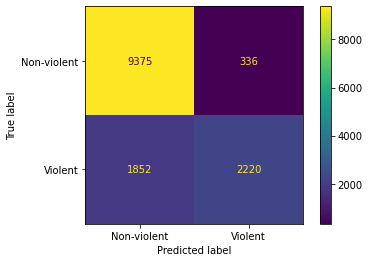

In [16]:
plot_confusion_matrix(svc, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [17]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.8412537183486904

In [18]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [19]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      9711
           1       0.87      0.55      0.67      4072

    accuracy                           0.84     13783
   macro avg       0.85      0.76      0.78     13783
weighted avg       0.84      0.84      0.83     13783



### Testing paramters with Grid Search CV

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':(['rbf']), 'C':[1, 10, 1E3]}
svc = SVC()
clf = GridSearchCV(svc, parameters)

clf.fit(X_train.values, y_train.values)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 1000.0], 'kernel': ['rbf']})

In [22]:
clf.best_params_

{'C': 1000.0, 'kernel': 'rbf'}

In [23]:
y_pred = clf.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


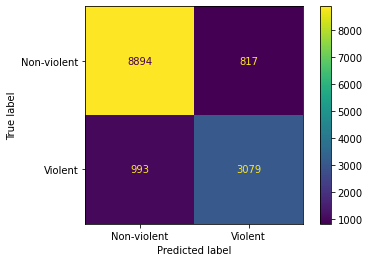

In [24]:
plot_confusion_matrix(clf, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [25]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.8686788072262933

In [26]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [27]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9711
           1       0.79      0.76      0.77      4072

    accuracy                           0.87     13783
   macro avg       0.84      0.84      0.84     13783
weighted avg       0.87      0.87      0.87     13783



### Export New Model w/ best features

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [9]:
svc = SVC(kernel = 'rbf', C = 1000, random_state=0)
svc.fit(X_train.values, y_train.values)

SVC(C=1000, random_state=0)

In [10]:
y_pred = svc.predict(X_test.values)

C:\Users\pjsan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


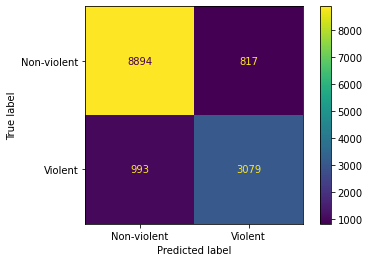

In [11]:
plot_confusion_matrix(svc, X_test.values, y_test.values, display_labels=["Non-violent", "Violent"])

In [12]:
accuracy_score1 = accuracy_score(y_test, y_pred)
accuracy_score1

0.8686788072262933

In [13]:
precision_score1 = precision_score(y_test, y_pred)
recall_score1 = recall_score(y_test, y_pred)
f1_score1 = f1_score(y_test, y_pred)

In [14]:
fp1, tp1, th1 = roc_curve(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_pred)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      9711
           1       0.79      0.76      0.77      4072

    accuracy                           0.87     13783
   macro avg       0.84      0.84      0.84     13783
weighted avg       0.87      0.87      0.87     13783



In [16]:
import joblib
joblib.dump(svc, 'violence_detector_seq4.pkl', compress=9)

['violence_detector_seq4.pkl']